In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
%matplotlib inline

In [5]:
from trackml.dataset import load_event, load_dataset
from trackml.randomize import shuffle_hits
from trackml.score import score_event

In [6]:
#loading one event
event_id = 'event000001000'
hits, cells, particles, truth = load_event('C:/Users/sumas/Downloads/train_sample/train_100_events/'+event_id)

In [10]:
#hits: x, y, z positions and the detectors groups they interacted with. This file contains the following data:
#hit_id: numerical identifier of the hit inside the event
#x,y,z: positioning of the hit
#volume_id: numerical identifier of the detector group
#layer_id: numerical identifier of the detector layer inside the group.
#module_id: numerical identifier of the detector module inside the layer

hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-64.409897,-7.163700,-1502.5,7,2,1
1,2,-55.336102,0.635342,-1502.5,7,2,1
2,3,-83.830498,-1.143010,-1502.5,7,2,1
3,4,-96.109100,-8.241030,-1502.5,7,2,1
4,5,-62.673599,-9.371200,-1502.5,7,2,1


In [11]:
hits.tail()

,hit_id,x,y,z,volume_id,layer_id,module_id
120934,120935,-763.862976,51.569401,2944.5,18,12,97
120935,120936,-808.705017,3.459260,2944.5,18,12,97
120936,120937,-982.935974,41.460899,2952.5,18,12,98
120937,120938,-942.698975,18.489100,2952.5,18,12,98
120938,120939,-922.890015,2.092850,2952.5,18,12,98


In [12]:
hits.describe()

,hit_id,x,y,z,volume_id,layer_id,module_id
count,120939.00000,120939.000000,120939.000000,120939.000000,120939.000000,120939.000000,120939.000000
mean,60470.00000,-1.769457,4.751043,-2.314452,10.921564,5.918389,371.969117
std,34912.22644,305.714539,305.173279,1061.935303,3.365705,3.407428,529.032206
min,1.00000,-1024.839966,-1025.109985,-2955.500000,7.000000,2.000000,1.000000
25%,30235.50000,-100.146000,-95.896503,-655.799988,8.000000,4.000000,60.000000
50%,60470.00000,-1.651340,1.005920,-1.800000,9.000000,6.000000,119.000000
75%,90704.50000,97.267651,103.224003,655.799988,13.000000,8.000000,490.000000
max,120939.00000,1025.329956,1024.849976,2955.500000,18.000000,14.000000,3192.000000


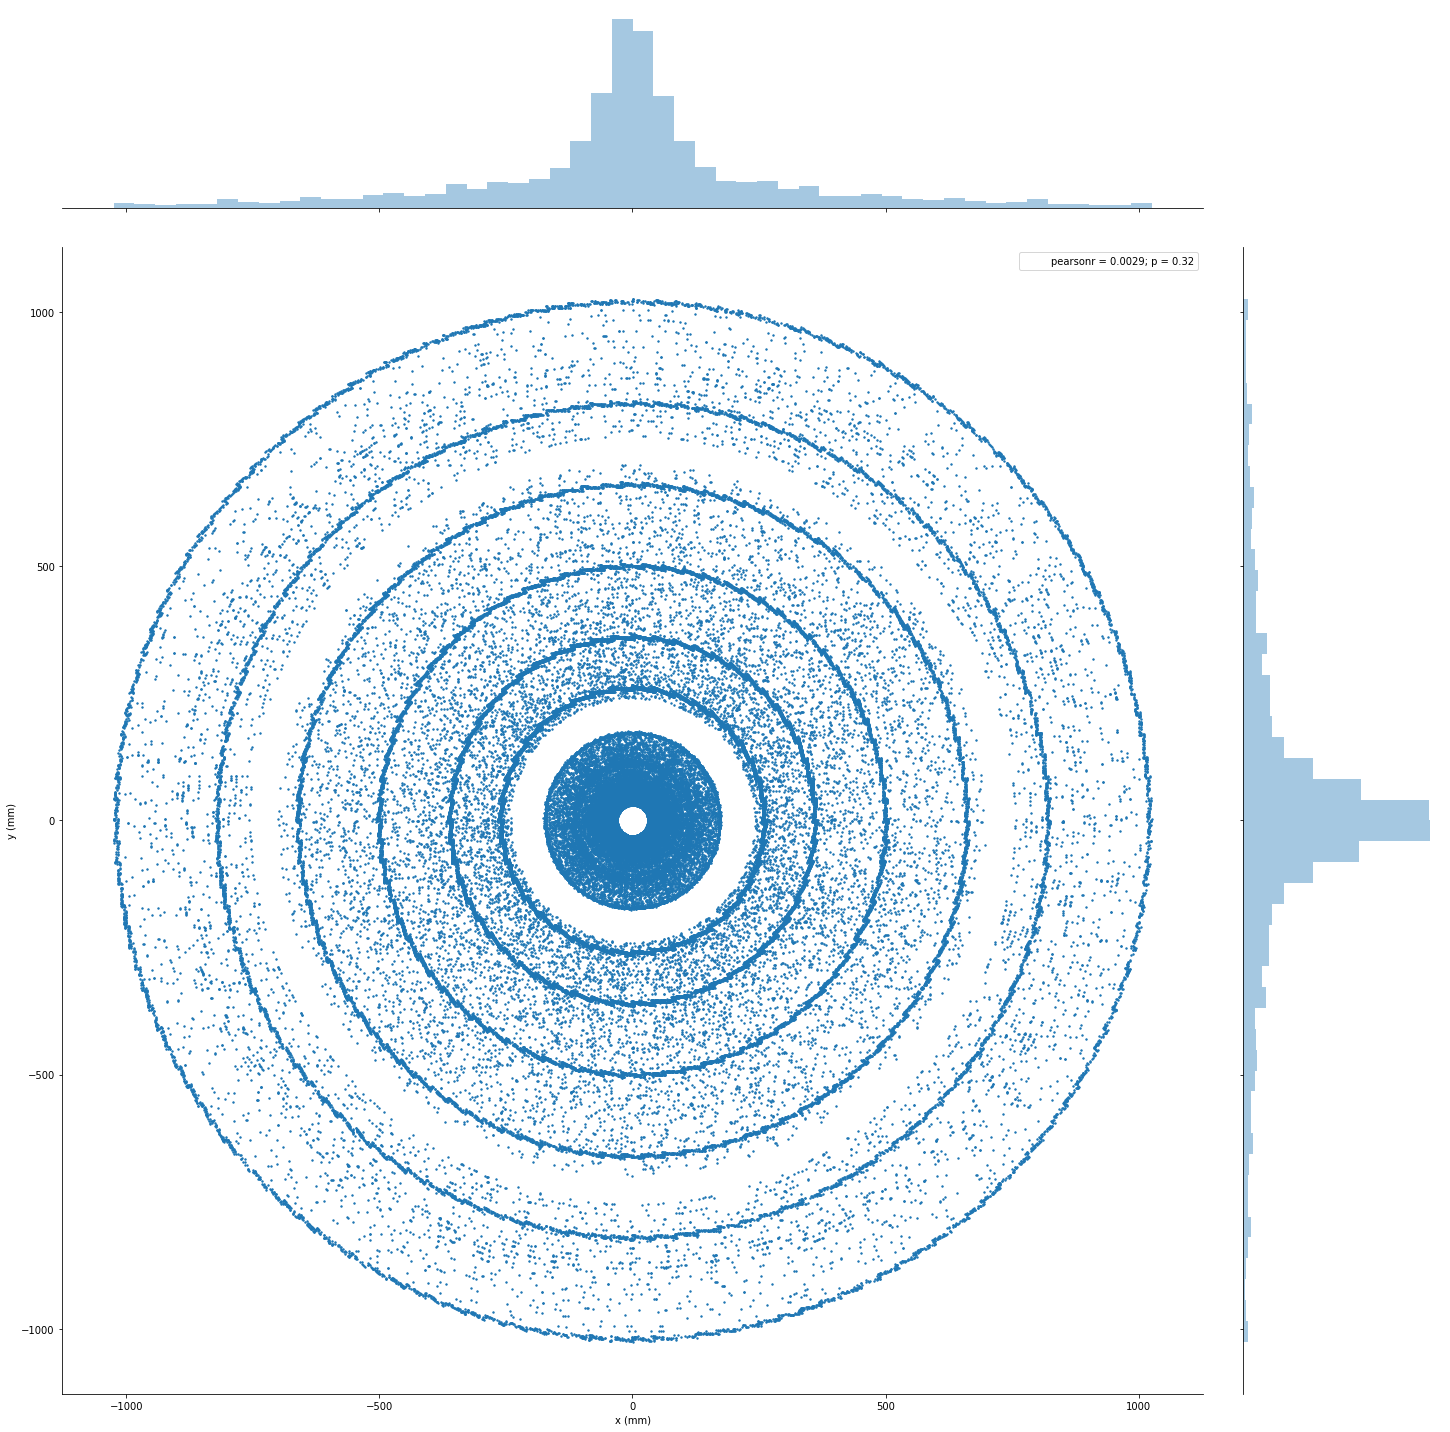

In [18]:
#Understanding the geometry of the detector
radialview = sns.jointplot(hits.x, hits.y, size=20, s=2)
radialview.set_axis_labels('x (mm)', 'y (mm)')
plt.show()

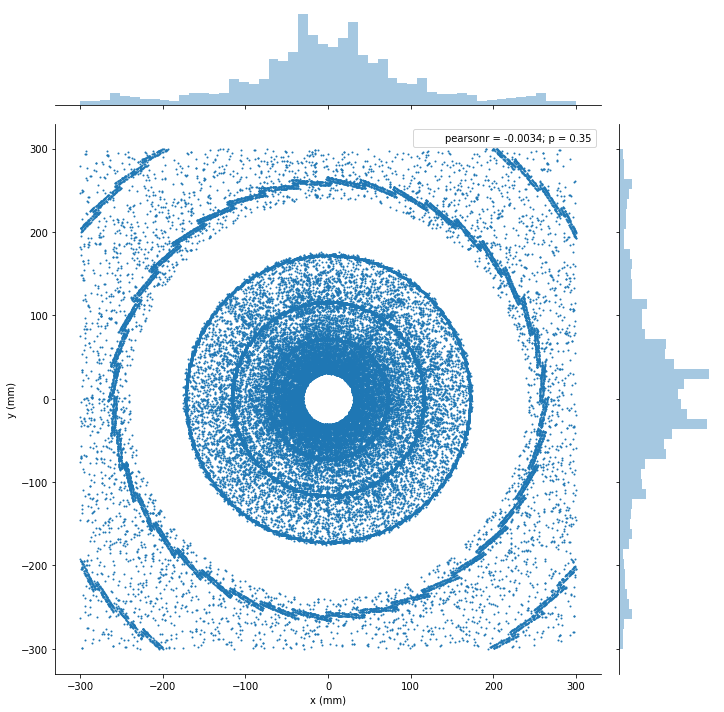

In [19]:
#zooming in
radialview = sns.jointplot( hits[hits.x.abs()<300].x, hits[hits.y.abs()<300].y, size=10, s=1)
radialview.set_axis_labels('x (mm)', 'y (mm)')
plt.show()

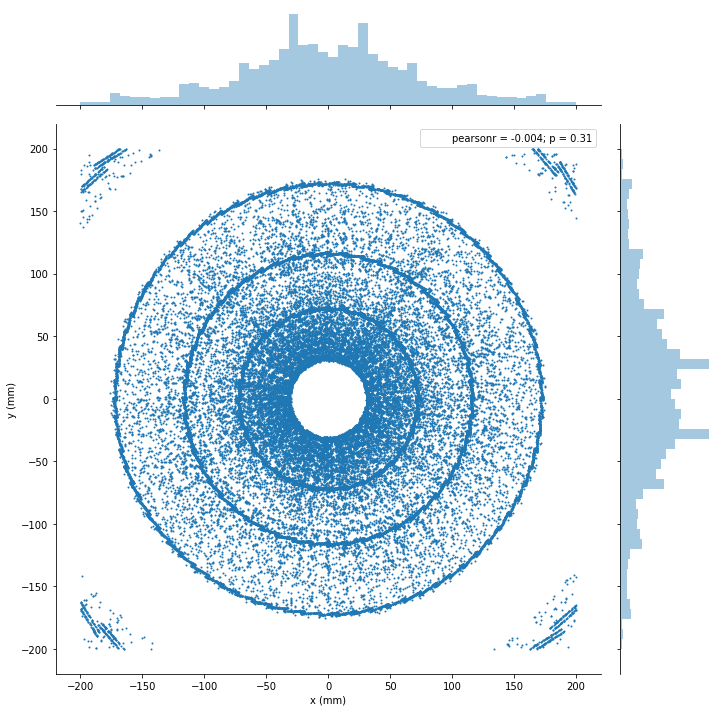

In [20]:
#zoming in
radialview = sns.jointplot( hits[hits.x.abs()<200].x, hits[hits.y.abs()<200].y, size=10, s=1)
radialview.set_axis_labels('x (mm)', 'y (mm)')
plt.show()

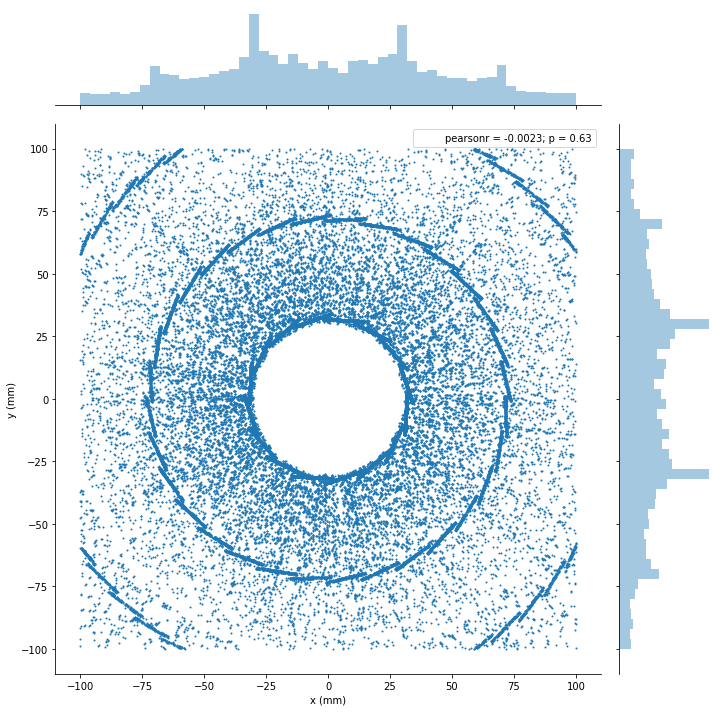

In [21]:
#zoming in
radialview = sns.jointplot( hits[hits.x.abs()<100].x, hits[hits.y.abs()<100].y, size=10, s=1)
radialview.set_axis_labels('x (mm)', 'y (mm)')
plt.show()

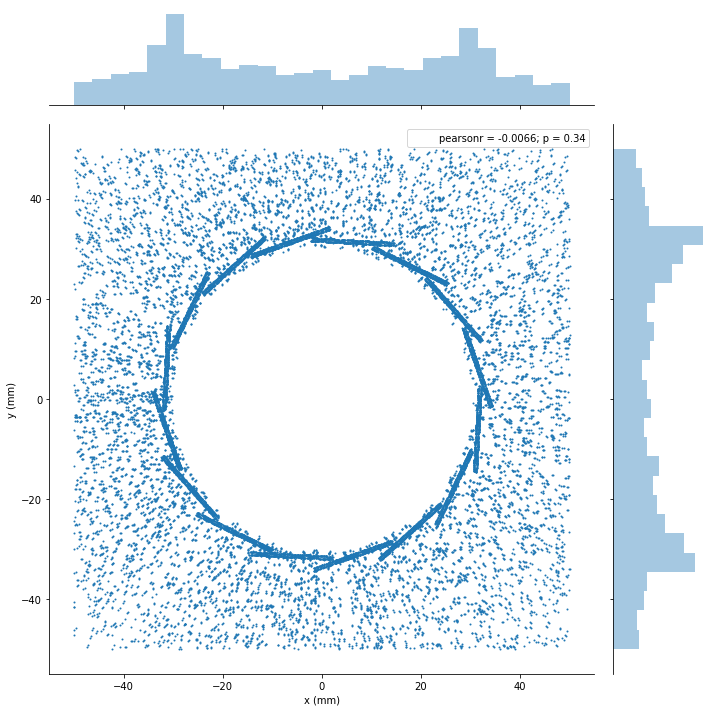

In [22]:
#zoming in
radialview = sns.jointplot( hits[hits.x.abs()<50].x, hits[hits.y.abs()<50].y, size=10, s=1)
radialview.set_axis_labels('x (mm)', 'y (mm)')
plt.show()

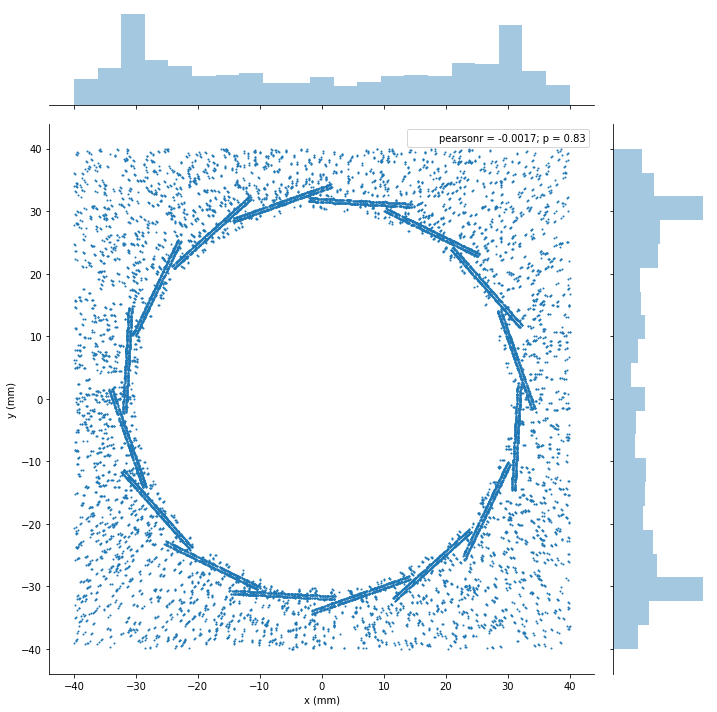

In [24]:
#zoming in
#solid core in the middle is probably more concentric detectors. If we zoom in and find out.
radialview = sns.jointplot( hits[hits.x.abs()<40].x, hits[hits.y.abs()<40].y, size=10, s=1)
radialview.set_axis_labels('x (mm)', 'y (mm)')
plt.show()

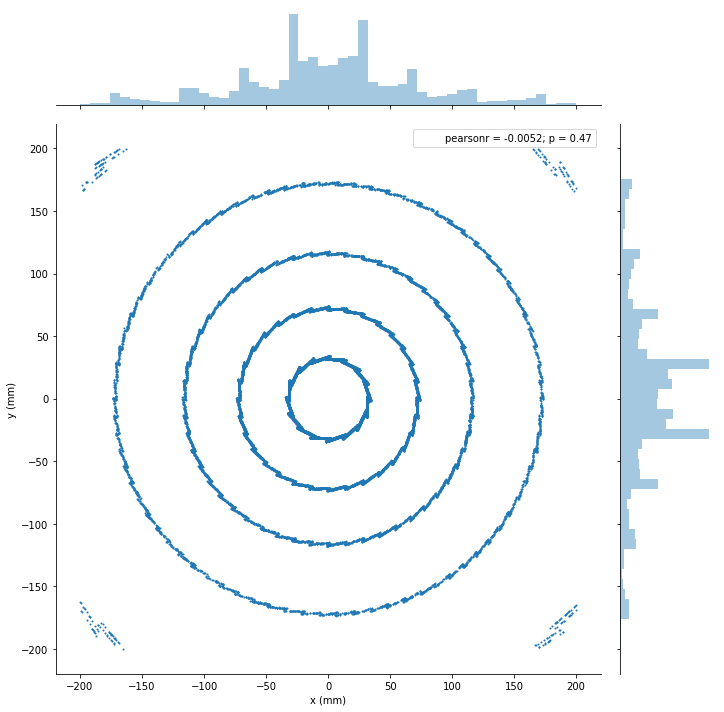

In [25]:
#Inner detector has more concemtric rings
#That scattering we see in between the rings are just events from the vertical detectors.
#Below shows these caps removed, and again shows the concentric nature of the inner detector.
nocap = hits[hits.z.abs()<200]
radialview = sns.jointplot( nocap[nocap.x.abs()<200].x, nocap[nocap.y.abs()<200].y, size=10, s=1)
radialview.set_axis_labels('x (mm)', 'y (mm)')
plt.show()

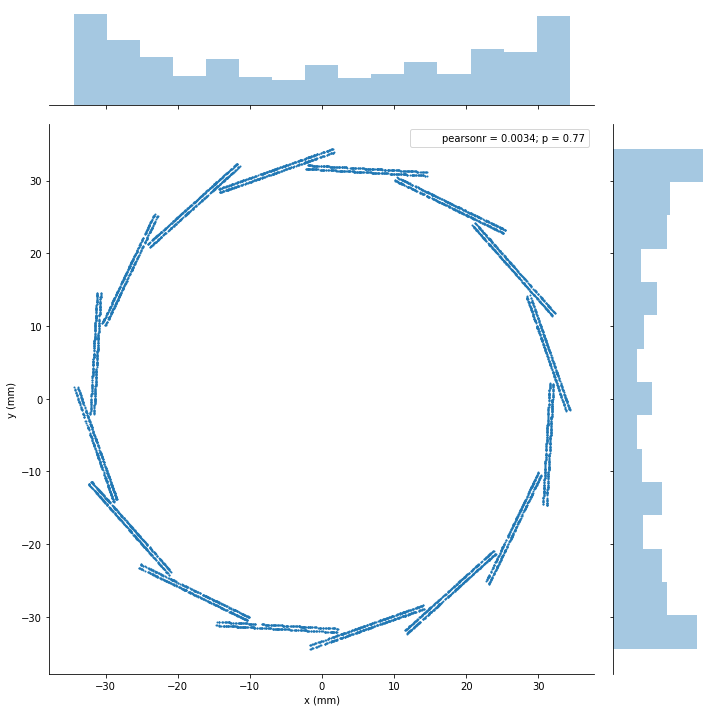

In [26]:
#the clipped detectors at the corners seemed to be layered. 
#This shows that these detectors are layered and re rectangular in fashion.
#Now, trying to zoom in
radialview = sns.jointplot( nocap[nocap.x.abs()<40].x, nocap[nocap.y.abs()<40].y, size=10, s=1)
radialview.set_axis_labels('x (mm)', 'y (mm)')
plt.show()

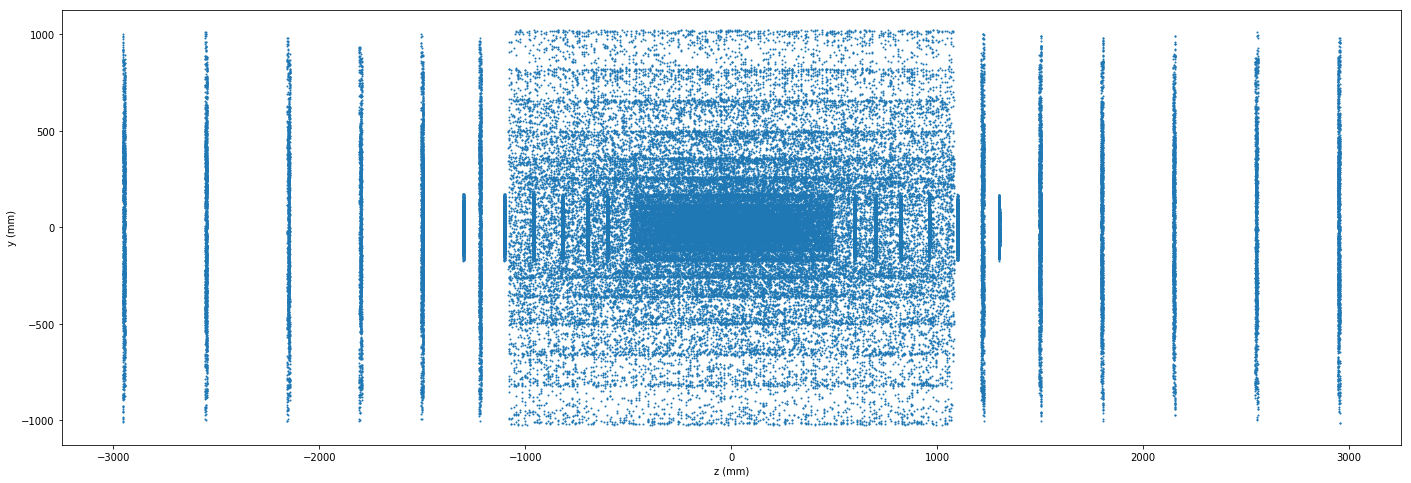

In [28]:
plt.figure(figsize=(24,8))
axialview = plt.scatter(hits.z, hits.y, s=1) 
plt.xlabel('z (mm)')
plt.ylabel('y (mm)')
plt.show()

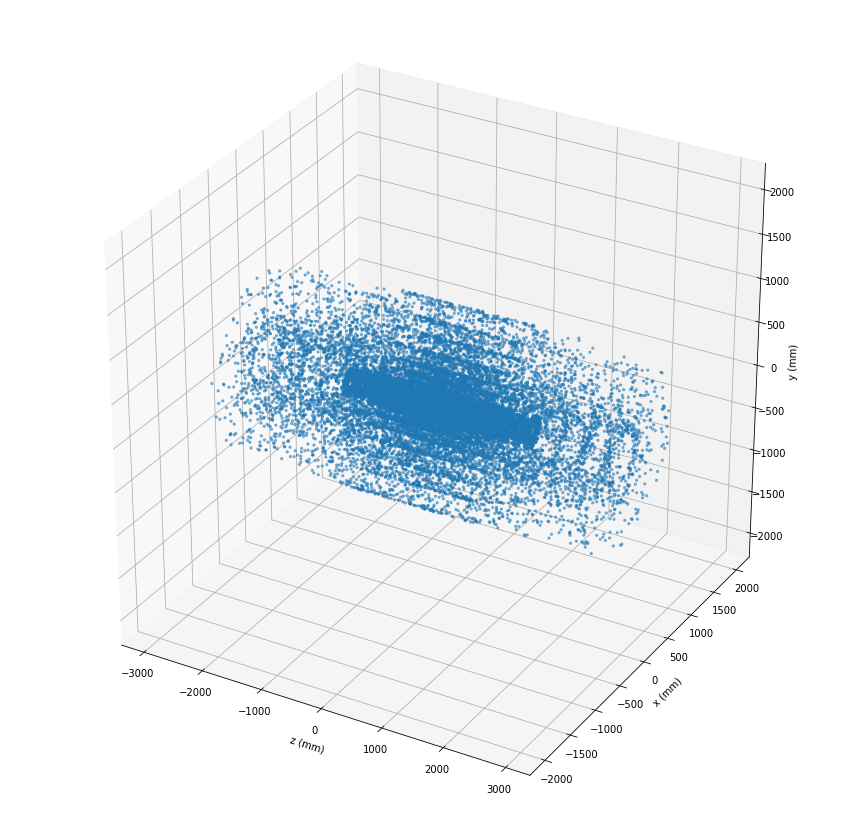

In [35]:
#combining both to get the 3d view
plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
sample = hits.sample(30000)
ax.scatter(sample.z, sample.x, sample.y, s=5, alpha=0.5)
ax.set_xlabel('z (mm)')
ax.set_ylabel('x (mm)')
ax.set_zlabel('y (mm)')
# These two added to widen the 3D space
ax.scatter(2000,2000,2000, s=0)
ax.scatter(-2000,-2000,-2000, s=0)
plt.show()

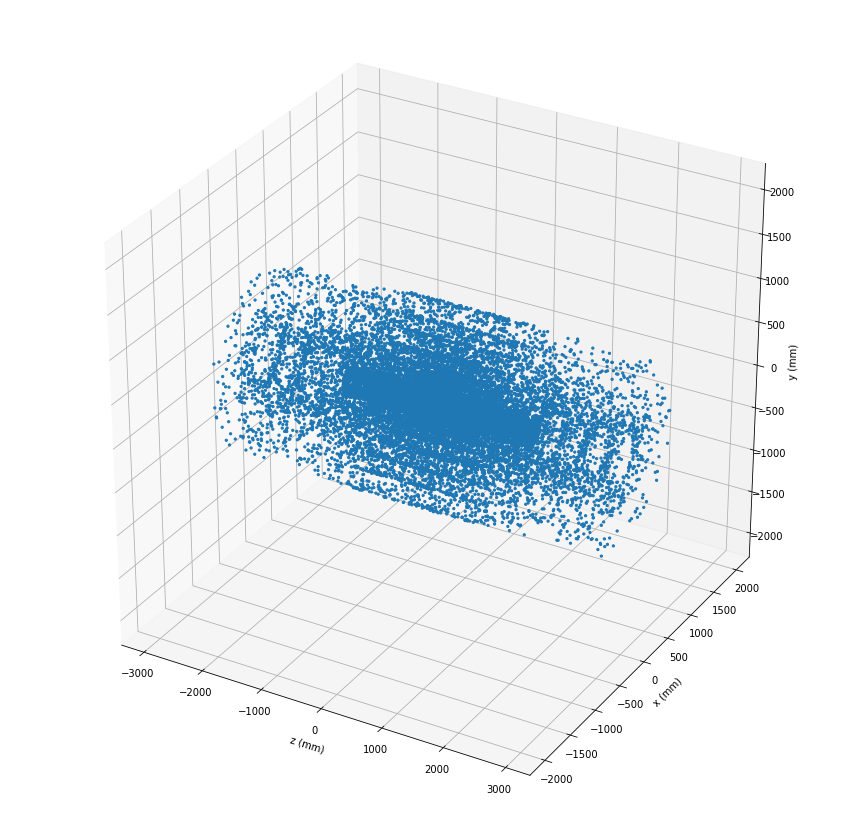

In [37]:
#combining both to get the 3d view
plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
sample = hits.sample(30000)
ax.scatter(sample.z, sample.x, sample.y, s=5, alpha=1.0)
ax.set_xlabel('z (mm)')
ax.set_ylabel('x (mm)')
ax.set_zlabel('y (mm)')
# These two added to widen the 3D space
ax.scatter(2000,2000,2000, s=0)
ax.scatter(-2000,-2000,-2000, s=0)
plt.show()

C:\Users\sumas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


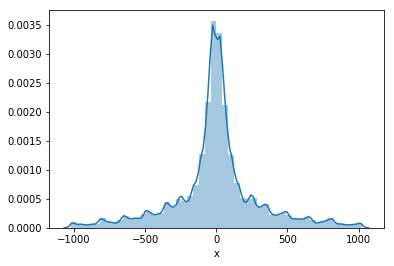

In [14]:
#Analysing the Hits data. Understanding the individual axis [distribution of x-axis co-ordinate]
x = hits.x
sns.distplot(x)
plt.show()

C:\Users\sumas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


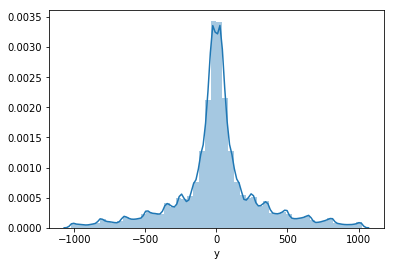

In [15]:
#Analysing the Hits data. Understanding the individual axis [distribution of x-axis co-ordinate]
y = hits.y
sns.distplot(y)
plt.show()

C:\Users\sumas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


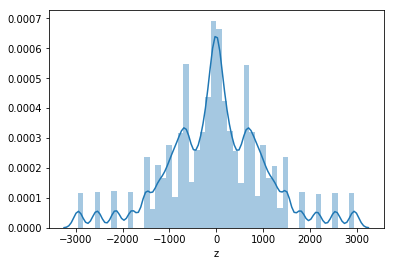

In [16]:
#Analysing the Hits data. Understanding the individual axis [distribution of x-axis co-ordinate]
z = hits.z
sns.distplot(z)
plt.show()

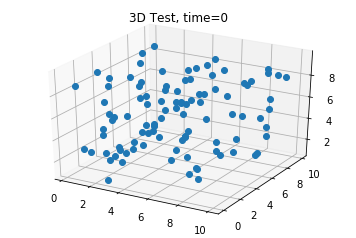

In [20]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation
import pandas as pd


a = np.random.rand(2000, 3)*10
t = np.array([np.ones(100)*i for i in range(20)]).flatten()
df = pd.DataFrame({"time": t ,"x" : a[:,0], "y" : a[:,1], "z" : a[:,2]})

def update_graph(num):
    data=df[df['time']==num]
    graph.set_data (data.x, data.y)
    graph.set_3d_properties(data.z)
    title.set_text('3D Test, time={}'.format(num))
    return title, graph, 


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
title = ax.set_title('3D Test')

data=df[df['time']==0]
graph, = ax.plot(data.x, data.y, data.z, linestyle="", marker="o")

ani = matplotlib.animation.FuncAnimation(fig, update_graph, 19, 
                               interval=40, blit=True)

plt.show()